In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ET_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla_20220606\\detections_ZTF18abvkwla.csv")
ET_1

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,magapbig,sigmagapbig,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid
0,ztf,58375.372141,621372140815015004,2,621372140815,20.640965,1,621,0.640157,20.053963,...,20.0331,0.3044,554120208.0,False,True,False,NaN,bulk_1.0.0,0,621433620815015000
1,ztf,58375.433623,621433620815015003,1,621433620815,20.892366,1,621,0.271876,19.710915,...,19.7264,0.1674,554120108.0,False,True,False,NaN,bulk_1.0.0,0,624452850815015000
2,ztf,58378.402269,624402260815015003,2,624402260815,20.675400,1,624,0.526670,20.573600,...,20.2916,0.3757,NaN,False,True,False,NaN,bulk_1.0.0,0,624452850815015000
3,ztf,58378.452859,624452850815015004,1,624452850815,20.796270,1,624,0.141980,20.424759,...,20.2442,0.2730,554120108.0,True,True,False,NaN,bulk_1.0.0,0,0


In [3]:
def find_err(event):
    event_red = event[event['fid']==1]
    event_green = event[event['fid']==2]
    red_peak_index = event_red['magpsf'].idxmin()
    green_peak_index = event_green['magpsf'].idxmin()
    return event_red['sigmapsf'][red_peak_index], event_green['sigmapsf'][green_peak_index]


In [4]:
ET_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla_20220606\\detections_ZTF18abvkwla.csv")
red_err_1, green_err_1 = find_err(ET_1)
print(red_err_1)
print(green_err_1)

0.11397287
0.13077879


In [5]:
ET_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abcfcoo_20220606\\detections_ZTF18abcfcoo.csv")
red_err_2, green_err_2 = find_err(ET_2)
print(red_err_2)
print(green_err_2)

0.131876
0.024389833


In [6]:
ET_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acigmel_20220606\\detections_ZTF20acigmel.csv")
red_err_3, green_err_3 = find_err(ET_3)

In [7]:
ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
red_err_4, green_err_4 = find_err(ET_4)

Text(0, 0.5, 'Peak Magnitude of Event')

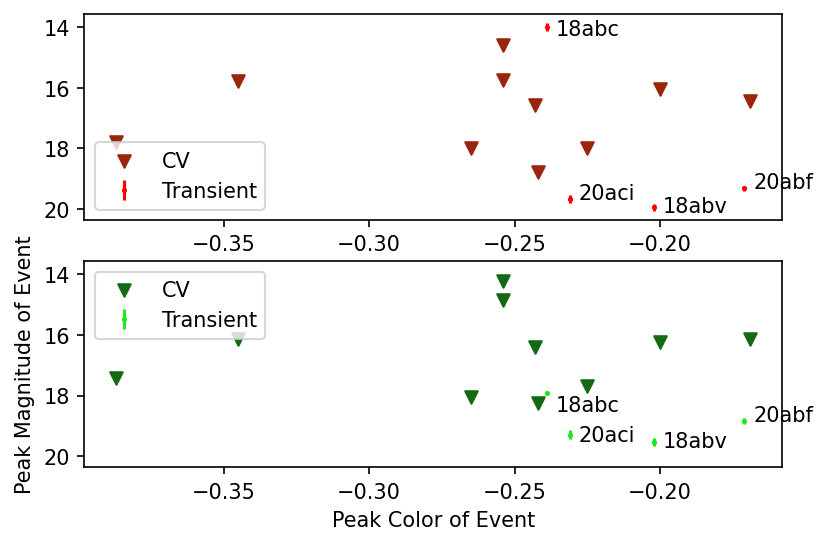

In [25]:
# red filter plot
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
r_trans_peak_color = [-0.202, -0.239, -0.231, -0.171]
r_trans_extinction = [0.115, 0.198, 0.182, 0.048]
r_trans_extinction = np.array(r_trans_extinction)
r_trans_peak_mag = [20.054, 14.202, 19.854, 19.368]
r_trans_peak_mag = np.array(r_trans_peak_mag)
r_trans_peak_mag = r_trans_peak_mag - r_trans_extinction
r_error = [red_err_1, red_err_2, red_err_3, red_err_4]
ax1.errorbar(r_trans_peak_color, r_trans_peak_mag, r_error, c='red', fmt='o', label='Transient', ms=1.5)

r_cv_peak_color = [-0.242, -0.387, -0.225, -0.254, -0.243, -0.265, -0.169, -0.2, -0.254, -0.345]
r_cv_extinction = [0.206, 0.531, 0.167, 0.234, 0.208, 0.259, 0.044, 0.111, 0.233, 0.437]
r_cv_extinction = np.array(r_cv_extinction)
r_cv_peak_mag = [18.998, 18.327, 18.143, 15.975, 16.780, 18.230, 16.463, 16.154, 14.815, 16.216]
r_cv_peak_mag = np.array(r_cv_peak_mag)
r_cv_peak_mag = r_cv_peak_mag - r_cv_extinction
ax1.scatter([r_cv_peak_color], [r_cv_peak_mag], c='#99250C', marker='v', label='CV')

ax1.legend()
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# green filter plot
ax2 = plt.subplot(2,1,2)
g_trans_peak_color = [-0.202, -0.239, -0.231, -0.171]
g_trans_extinction = [0.167, 0.287, 0.263, 0.069]
g_trans_extinction = np.array(g_trans_extinction)
g_trans_peak_mag = [19.711, 18.204, 19.558, 18.915]
g_trans_peak_mag = np.array(g_trans_peak_mag)
g_trans_peak_mag = g_trans_peak_mag - g_trans_extinction
g_error = [green_err_1, green_err_2, green_err_3, green_err_4]
plt.subplot(2,1,2)
plt.errorbar(g_trans_peak_color, g_trans_peak_mag, g_error, c='#1DE71D', fmt='o', label='Transient', ms=1.5)

g_cv_peak_color = [-0.242, -0.387, -0.225, -0.254, -0.243, -0.265, -0.169, -0.2, -0.254, -0.345]
g_cv_extinction = [0.298, 0.768, 0.242, 0.338, 0.301, 0.374, 0.063, 0.161, 0.337, 0.632]
g_cv_extinction = np.array(g_cv_extinction)
g_cv_peak_mag = [18.530, 18.184, 17.935, 15.190, 16.698, 18.417, 16.182, 16.385, 14.540, 16.760]
g_cv_peak_mag = np.array(g_cv_peak_mag)
g_cv_peak_mag = g_cv_peak_mag - g_cv_extinction
plt.scatter([g_cv_peak_color], [g_cv_peak_mag], c='#146A14', marker='v', label='CV')
ax2.legend()

# formatting
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# adding text
ax1.text(-0.199, 20.1, '18abv')
ax1.text(-0.236, 14.25, '18abc')
ax1.text(-0.228, 19.672, '20aci')
ax1.text(-0.168, 19.32, '20abf')

ax2.text(-0.199, 19.7, '18abv')
ax2.text(-0.236, 18.5, '18abc')
ax2.text(-0.228, 19.5, '20aci')
ax2.text(-0.168, 18.846, '20abf')

plt.xlabel("Peak Color of Event")
plt.ylabel("Peak Magnitude of Event")